In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [6]:
import pandas as pd
data_pegawai= pd.read_excel("C:/Users/arsinta/OneDrive/Documents/DATA KOMPETENSI SEMENTARA (1).xlsx", header=1)
data_pegawai

,No,NIP,Nama,CPOB_Dasar,CPOB_Lanjutan,CPOB_Topik_Khusus,Unit_Transfusi_Darah,CDOB/NAPZA_Internal,Inspektur_CDOB_Junior,Inspektur_CDOB_Senior,...,PMR_Makanan_Kaleng,BPCS,Sosialisasi_dan_Bimtek_SMKPO,Pengawasan_Iklan_Pangan _Olahan,Sosialisasi_CPPOB_dan_Pemeriksaan_Sarana_Produksi_Pangan_Olahan,FSMS,PPNS,Intelijen,Lama_Bekerja,Pangkat/Golongan
0,1,19731105 200003 2 001,"Nurmayulis, S.Si, Apt",1.0,1.0,1.0,NaN,1.0,1,1.0,...,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,2000,"Pembina, IV/a"
1,2,19670615 199703 2 001,"Dra. Yuliana Buntugayang, Apt",1.0,1.0,1.0,NaN,1.0,,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,"Pembina Tk.I, IV/b"
2,3,19671110 199703 2 001,"Dra. Hesti Sila Rahayu, Apt",NaN,NaN,NaN,NaN,1.0,1,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1997,"Pembina, IV/a"
3,4,19721126 199903 2 001,"Nur Zaenab, S.Si Apt",NaN,NaN,NaN,NaN,1.0,1,NaN,...,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1999,"Pembina Tk.I, IV/b"
4,5,19710828 199903 2 012,"Tri Indah Mayasari, S.Si, Apt",1.0,1.0,1.0,1.0,1.0,1,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1999,"Pembina, IV/a"
5,6,19741003 200501 2 001,"Setyo Utami, S.Si, Apt",1.0,1.0,1.0,1.0,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2005,"Pembina, IV/a"
6,7,19820811 200604 2 005,"Vannina Agustyani,S.Farm,Apt,M.Farm",1.0,1.0,1.0,NaN,1.0,1,1.0,...,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,2006,"Penata Tk.I, III/d"
7,8,19801222 200604 2 005,"Wahyuwasti Kiki Mustikasari, S.Farm, Apt,M.Sc",1.0,1.0,1.0,1.0,1.0,1,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2006,"Penata Tk.I, III/d"
8,9,19810808 200604 1 004,"Bagoes Lanang, S.Farm,Apt,M.Farm",1.0,1.0,1.0,NaN,1.0,1,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2006,"Penata Tk.I, III/d"
9,10,19860116 201012 2 006,"Hilmah, S.Farm,Apt.",1.0,1.0,1.0,NaN,1.0,1,NaN,...,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,2010,"Pembina, IV/a"


In [7]:
data_pegawai["Lama_Bekerja_fix"] = 2025 - data_pegawai["Lama_Bekerja"]


In [8]:
# Hilangkan spasi di awal/akhir semua kolom
data_pegawai.columns = data_pegawai.columns.str.strip()

kompetensi_cols = [
 'CPOB_Dasar',
 'CPOB_Lanjutan',
 'CPOB_Topik_Khusus',
 'Unit_Transfusi_Darah',
 'CDOB/NAPZA_Internal',
 'Inspektur_CDOB_Junior',
 'Inspektur_CDOB_Senior',
 'Inspektur_CDOB_Kepala',
 'Bimtek_CDOB',
 'NAPZA',
 'Sampling_IDEAS',
 'Sampling_Tk._Dasar',
 'Sampling_Tk._Lanjutan',
 'Rokok_Penandaan_Obat',
 'TOT_Vaksin',
 'Penyusunan_SOP_Dalam_Upaya_Pemenuhan_CDOB',
 'Bimtek_CPOTB',
 'CPOTB_Dasar',
 'CPOTB_Lanjutan',
 'CPOTB_Topik_Khusus',
 'Penandaan_Iklan_OT',
 'Sampling_IDEAS.1',
 'Sampling',
 'Audit_DIP',
 'Inspektur_Kosmetik_Junior',
 'Inspektur_Kosmetik_Senior',
 'Inspektur_Kosmetik_Kepala',
 'Sampling_IDEAS.2',
 'Sampling.1',
 'Food_Inspector_Dasar',
 'Food_Inspector_Muda',
 'Food_Inspector_Lanjutan',
 'OJT_(AMDK/KALENG/SUSU)',
 'Surveillan_KLB_Keracunan_Pangan',
 'Fortifikasi_Pangan',
 'CRPB',
 'PMR_Makanan_Kaleng',
 'BPCS',
 'Sosialisasi_dan_Bimtek_SMKPO',
 'Pengawasan_Iklan_Pangan _Olahan',
 'Sosialisasi_CPPOB_dan_Pemeriksaan_Sarana_Produksi_Pangan_Olahan',
 'FSMS',
 'PPNS',
 'Intelijen'
]



In [9]:
# Ganti NaN dan spasi kosong dengan 0
data_pegawai[kompetensi_cols] = data_pegawai[kompetensi_cols].replace(' ', 0).fillna(0)

# Ubah tipe menjadi integer
data_pegawai[kompetensi_cols] = data_pegawai[kompetensi_cols].astype(int)


C:\Users\arsinta\AppData\Local\Temp\ipykernel_12020\4227220540.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_pegawai[kompetensi_cols] = data_pegawai[kompetensi_cols].replace(' ', 0).fillna(0)


In [10]:
# Pastikan kolom yang dimaksud ada di dataframe
kompetensi_cols = [col for col in kompetensi_cols if col in data_pegawai.columns]

# Ganti NaN dengan 0 untuk kolom kompetensi
data_pegawai[kompetensi_cols] = data_pegawai[kompetensi_cols].fillna(0)

data_pegawai[kompetensi_cols] = data_pegawai[kompetensi_cols].astype(int)

In [11]:
data_pegawai[kompetensi_cols] = data_pegawai[kompetensi_cols].replace(" ", 0)  # kosong umur jadi 0
data_pegawai["Jumlah_Kompetensi"] = data_pegawai[kompetensi_cols].fillna(0).astype(float).sum(axis=1)
# Misal kolom kompetensi sudah diisi 0/1 dan bertipe int
kompetensi_cols = [col for col in data_pegawai.columns if col in kompetensi_cols]

# Hitung jumlah kompetensi
data_pegawai['Jumlah_Kompetensi'] = data_pegawai[kompetensi_cols].sum(axis=1).astype(int)


C:\Users\arsinta\AppData\Local\Temp\ipykernel_12020\175710633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


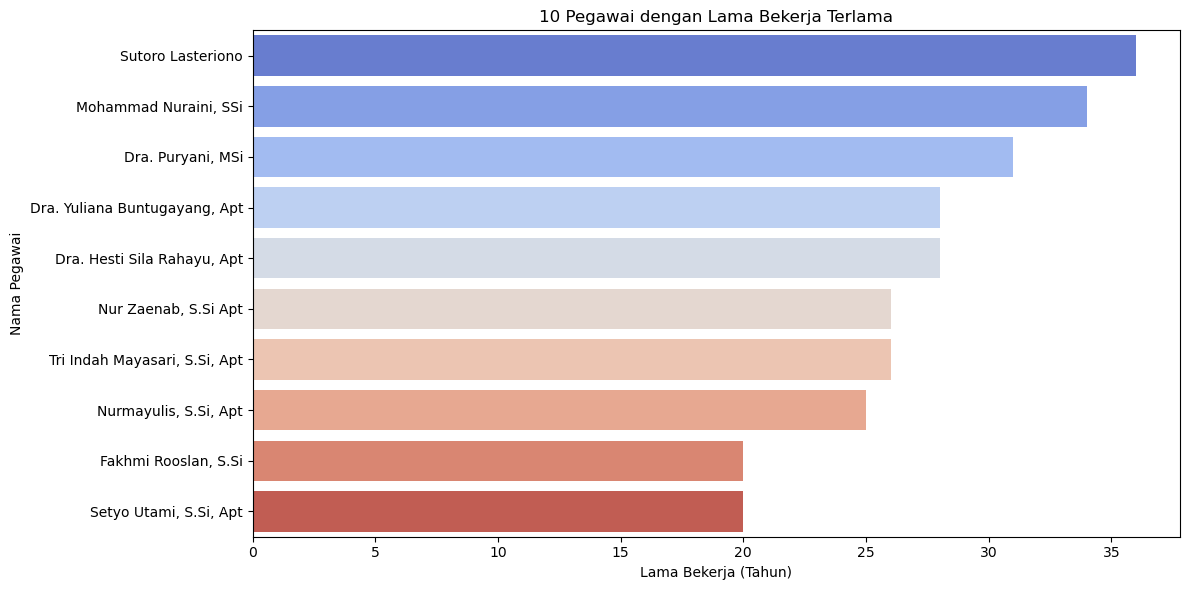

In [12]:
top_lama_kerja = data_pegawai.sort_values(
    by='Lama_Bekerja_fix', ascending=False
).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_lama_kerja,
    y='Nama',
    x='Lama_Bekerja_fix',
    palette='coolwarm'
)
plt.title("10 Pegawai dengan Lama Bekerja Terlama")
plt.xlabel("Lama Bekerja (Tahun)")
plt.ylabel("Nama Pegawai")
plt.tight_layout()
plt.show()


C:\Users\arsinta\AppData\Local\Temp\ipykernel_12020\175710633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


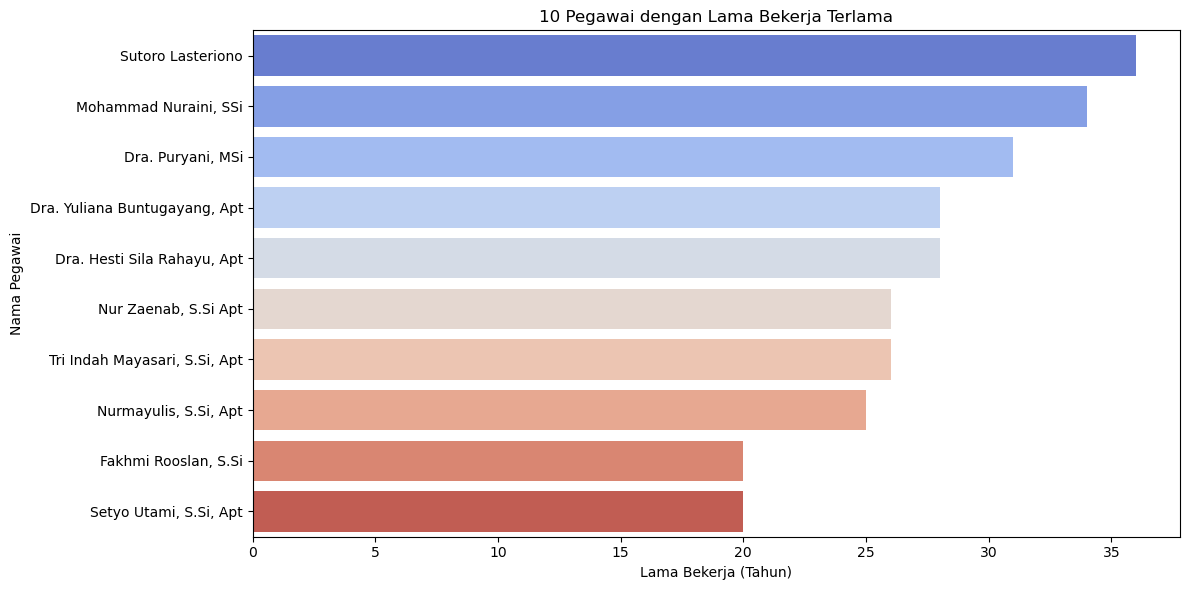

In [17]:
top_lama_kerja = data_pegawai.sort_values(
    by='Lama_Bekerja_fix', ascending=False
).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_lama_kerja,
    y='Nama',
    x='Lama_Bekerja_fix',
    palette='coolwarm'
)
plt.title("10 Pegawai dengan Lama Bekerja Terlama")
plt.xlabel("Lama Bekerja (Tahun)")
plt.ylabel("Nama Pegawai")
plt.tight_layout()
plt.show()


C:\Users\arsinta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arsinta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arsinta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arsinta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

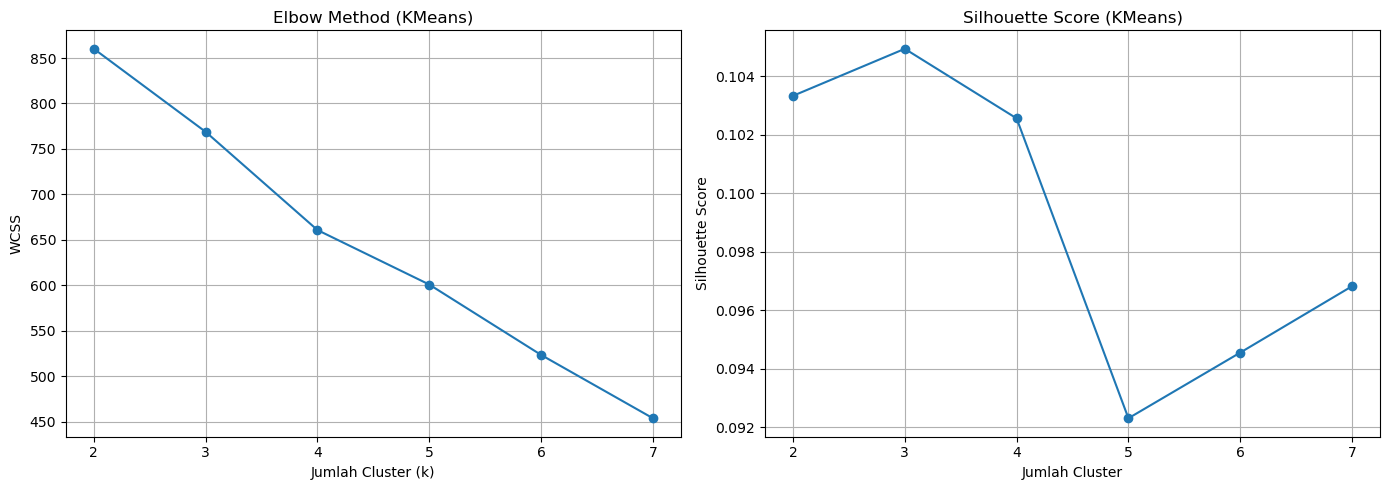

Rekomendasi jumlah cluster terbaik (KMeans) berdasarkan Silhouette: 3


In [18]:
df = data_pegawai.copy()
df.columns = df.columns.str.strip()

# Ekstraksi golongan
df[['Gol_Level_Raw', 'Gol_Sub_Raw']] = df['Pangkat/Golongan'].str.extract(
    r'((?:I|II|III|IV|V|VI|IX)+)[\s,/\-]*([a-dA-D])'
)

roman_map = {"I":1,"II":2,"III":3,"IV":4,"V":5,"VI":6,"IX":9}
huruf_map = {"a":1,"b":2,"c":3,"d":4,"A":1,"B":2,"C":3,"D":4}

df['Golongan_Level'] = df['Gol_Level_Raw'].map(roman_map)
df['Golongan_Sub'] = df['Gol_Sub_Raw'].map(huruf_map)

df['Golongan_Num'] = df['Golongan_Level'] + df['Golongan_Sub'] / 10

features = df[kompetensi_cols + ['Lama_Bekerja_fix', 'Golongan_Num']].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

wcss = []
sil_scores = {}
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    
    labels = km.labels_
    sil_scores[k] = silhouette_score(X_scaled, labels)

plt.figure(figsize=(14,5))

# Elbow
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method (KMeans)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.grid(True)

# Silhouette
plt.subplot(1, 2, 2)
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title("Silhouette Score (KMeans)")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# Tentukan k terbaik
best_k = max(sil_scores, key=sil_scores.get)
print(f"Rekomendasi jumlah cluster terbaik (KMeans) berdasarkan Silhouette: {best_k}")

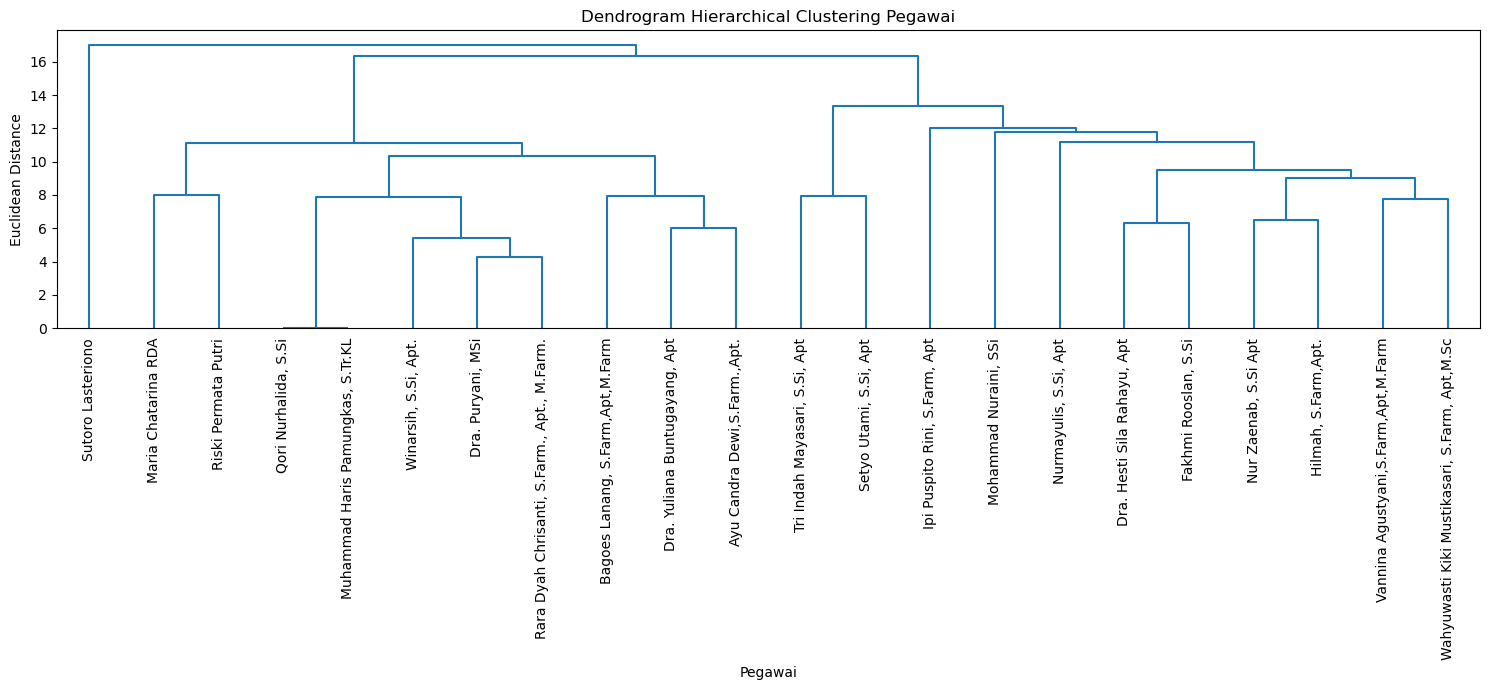

In [14]:
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(15,7))
dendrogram(
    linkage_matrix,
    labels=df['Nama'].values,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0
)
plt.title("Dendrogram Hierarchical Clustering Pegawai")
plt.xlabel("Pegawai")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

df['Cluster'] = fcluster(linkage_matrix, best_k, criterion='maxclust') - 1

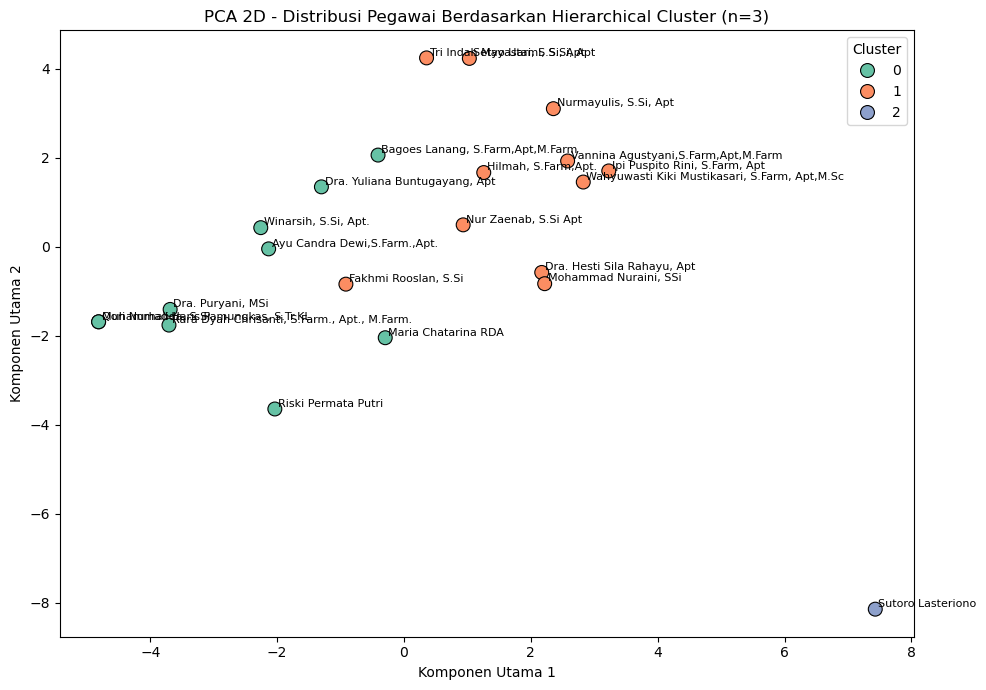

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_vis = pd.DataFrame(pca_result, columns=['PC1','PC2'])
df_vis['Cluster'] = df['Cluster']
df_vis['Nama'] = df['Nama']

plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=df_vis,
    palette='Set2',
    s=100, edgecolor='black'
)

# Label nama
for i, txt in enumerate(df_vis['Nama']):
    plt.annotate(txt, (df_vis.PC1[i] + 0.05, df_vis.PC2[i] + 0.05), fontsize=8)

plt.title(f'PCA 2D - Distribusi Pegawai Berdasarkan Hierarchical Cluster (n={best_k})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Rata-rata Kompetensi, Lama Bekerja, Golongan per Cluster:


,CPOB_Dasar,CPOB_Lanjutan,CPOB_Topik_Khusus,Unit_Transfusi_Darah,CDOB/NAPZA_Internal,Inspektur_CDOB_Junior,Inspektur_CDOB_Senior,Inspektur_CDOB_Kepala,Bimtek_CDOB,NAPZA,...,PMR_Makanan_Kaleng,BPCS,Sosialisasi_dan_Bimtek_SMKPO,Pengawasan_Iklan_Pangan _Olahan,Sosialisasi_CPPOB_dan_Pemeriksaan_Sarana_Produksi_Pangan_Olahan,FSMS,PPNS,Intelijen,Lama_Bekerja_fix,Golongan_Num
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.400000,0.400000,0.300000,0.000000,0.7,0.7,0.100000,0.000000,0.8,0.000000,...,0.000000,0.100000,0.100000,0.0,0.300000,0.300000,0.000000,0.000000,16.400000,3.787500
1,0.636364,0.636364,0.636364,0.272727,1.0,1.0,0.272727,0.090909,1.0,0.181818,...,0.090909,0.181818,0.272727,0.0,0.909091,0.909091,0.181818,0.090909,22.090909,3.790909
2,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,36.000000,3.400000


C:\Users\arsinta\AppData\Local\Temp\ipykernel_12020\1108498667.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_count.index, y=cluster_count.values, palette='viridis')


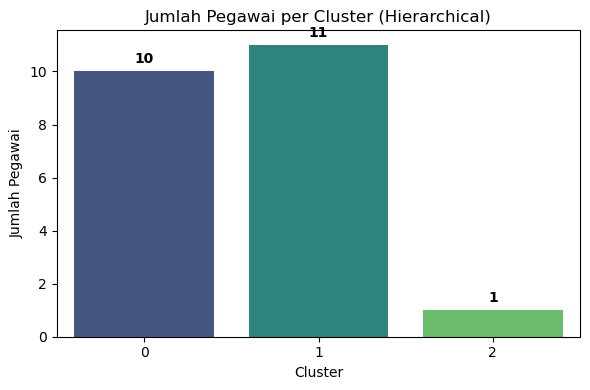

In [16]:
cluster_summary = df.groupby('Cluster')[kompetensi_cols + ['Lama_Bekerja_fix', 'Golongan_Num']].mean()

print("\nRata-rata Kompetensi, Lama Bekerja, Golongan per Cluster:")
display(cluster_summary)

cluster_count = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_count.index, y=cluster_count.values, palette='viridis')
for i, v in enumerate(cluster_count.values):
    plt.text(i, v + 0.3, f"{v}", ha='center', fontsize=10, weight='bold')

plt.title("Jumlah Pegawai per Cluster (Hierarchical)")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pegawai")
plt.tight_layout()
plt.show()